In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
"""
# 1. np.random.rand(100, 1) creates 100x1 array of numbers in [0, 1)
random_values = np.random.rand(100, 1)  # eg: [[0.23], [0.67], [0.89], ...]

# 2. Multiply by 2: scales range to [0, 2)
scaled_values = 2 * random_values  # now in range [0, 2)

# 3. Add 0.5: shifts range to [0.5, 2.5)
final_values = scaled_values + 0.5  # now in range [0.5, 2.5)

# So: X = 2 * np.random.rand(100, 1) + 0.5
# creates numbers uniformly distributed between 0.5 and 2.5


# Option A: Using rand() with scaling 
X1 = 2 * np.random.rand(100, 1) + 0.5  # Features between 0.5 and 2.5

# Option B: Using uniform() - more readable
X2 = np.random.uniform(0.5, 2.5, (100, 1))  # Same result, clearer intent

# Option C: Using randn() for normally distributed features
X3 = 1.5 + 0.5 * np.random.randn(100, 1)  # Mean=1.5, Std=0.5

"""



In [32]:
# Create Sample data
# Predicting house prices based on size
np.random.seed(42)

# Random values between 0.5 and 2.5
X = 2 * np.random.rand(100, 1) + 0.5
# Scale to represent square footage ( 500 - 3500)
X = X * 1000

# True relationship: price = 50,000 + 100 * size + noise
# This means each square foot adds $100 to the price, with a base of $50,000
y = 50000 + 100 * X + np.random.randn(100,1) * 10000

print(f"Data shape:\n")
print(f"X(features) shape:{X.shape}")
print(f"y(target) shape:  {y.shape}\n")
print(f"First 5 samples\n")
print(f"Size(sq ft) | Price($)")
for i in range(5):
    print(f"{X[i, 0]:10.2f}  |{y[i, 0]:10.2f}")

Data shape:

X(features) shape:(100, 1)
y(target) shape:  (100, 1)

First 5 samples

Size(sq ft) | Price($)
   1249.08  | 175778.49
   2401.43  | 287152.79
   1963.99  | 247316.40
   1697.32  | 199856.01
    812.04  | 129007.01



ATTEMPT 2: WITH column of ones (CORRECT)

Now our X matrix looks like this:
[[1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]]
Shape: (5, 2)

First column: all 1s (this is for θ₀)
Second column: our actual data (this is for θ₁)

✓ Result: θ = 
[[46.4]
 [ 4.2]]

✓ θ₀ (intercept/bias) = 46.40
✓ θ₁ (slope/weight)   = 4.20

✓ Our equation: y = 46.40 + 4.20 × x


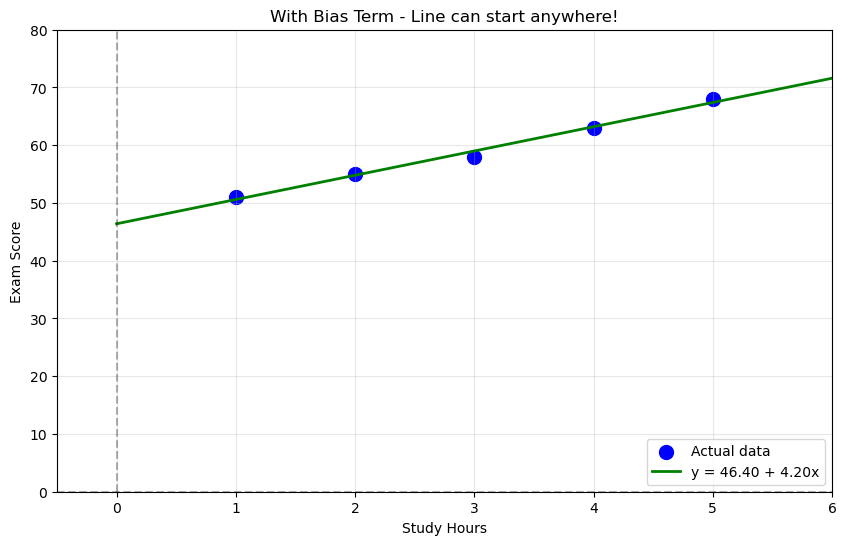


✓ Error: 0.32
✓ Much better fit!


In [36]:
print("\n" + "="*50)
print("ATTEMPT 2: WITH column of ones (CORRECT)")
print("="*50)

# Add a column of ones to X
X_with_ones = np.c_[np.ones((5, 1)), study_hours.reshape(-1, 1)]

print("\nNow our X matrix looks like this:")
print(X_with_ones)
print(f"Shape: {X_with_ones.shape}")
print("\nFirst column: all 1s (this is for θ₀)")
print("Second column: our actual data (this is for θ₁)")

# Apply normal equation
theta = np.linalg.inv(X_with_ones.T @ X_with_ones) @ X_with_ones.T @ y

print(f"\n✓ Result: θ = ")
print(theta)
print(f"\n✓ θ₀ (intercept/bias) = {theta[0, 0]:.2f}")
print(f"✓ θ₁ (slope/weight)   = {theta[1, 0]:.2f}")

print(f"\n✓ Our equation: y = {theta[0, 0]:.2f} + {theta[1, 0]:.2f} × x")

# Make predictions
y_pred = X_with_ones @ theta

plt.figure(figsize=(10, 6))
plt.scatter(study_hours, exam_scores, color='blue', s=100, label='Actual data')
x_line = np.array([0, 6])
y_line = theta[0, 0] + theta[1, 0] * x_line
plt.plot(x_line, y_line, 'g-', linewidth=2, label=f'y = {theta[0,0]:.2f} + {theta[1,0]:.2f}x')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.title('With Bias Term - Line can start anywhere!')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(-0.5, 6)
plt.ylim(0, 80)
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.axvline(x=0, color='black', linestyle='--', alpha=0.3)
plt.show()

print(f"\n✓ Error: {np.mean((y - y_pred)**2):.2f}")
print("✓ Much better fit!")